## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = pd.merge(study_results,mouse_metadata, on='Mouse ID', how = 'left')

# Display the data table for preview
dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice. Grouping by Mouse ID and Timepoint to count duplicates (>2)
dataset_gp = dataset.groupby(['Mouse ID','Timepoint'])['Sex'].count()
mouseID = pd.DataFrame(dataset_gp)
mouseID = mouseID.rename(columns = {'Sex':'Mouse Count'})
mouseID

Mouse Count
Mouse ID Timepoint             
a203     0                    1
         5                    1
         10                   1
         15                   1
         20                   1
...                         ...
z969     25                   1
         30                   1
         35                   1
         40                   1
         45                   1

[1888 rows x 1 columns]

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouseID.loc[(mouseID['Mouse Count'] > 1), : ]
duplicate_mice = duplicate_mice.reset_index()   #  pandas.core.frame.DataFrame
delete_mice = duplicate_mice['Mouse ID'].unique()   # numpy.ndarray
print(delete_mice)

['g989']


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
delete_mice_all = dataset.loc[(dataset['Mouse ID'] == 'g989'), :]
delete_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = dataset.set_index('Mouse ID')
clean_data = clean_data.drop(index = delete_mice)
clean_data = clean_data.reset_index()

In [27]:
# Checking the number of mice in the clean DataFrame, see 'length:' in display for line count.
clean_data.value_counts()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
z969      45         73.867845           4                 Naftisol      Male    9           30            1
i386      20         55.087724           2                 Infubinol     Female  23          29            1
i334      10         41.631247           0                 Ramicane      Female  8           20            1
          15         39.158001           0                 Ramicane      Female  8           20            1
          20         39.687832           0                 Ramicane      Female  8           20            1
                                                                                                          ..
q633      5          47.183802           0                 Zoniferol     Male    12          25            1
          10         49.001866           0                 Zoniferol     Male    12          25            1
          15         50.

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# create subset based on Drug Regimen
summary_gp = clean_data.groupby('Drug Regimen')
summary_st = summary_gp['Tumor Volume (mm3)'].mean()
summary_st = pd.DataFrame(summary_st)

# statistic functions in pandas
summary_st = summary_st.rename(columns={'Tumor Volume (mm3)':'Mean'})
summary_st['Median'] = summary_gp['Tumor Volume (mm3)'].median()
summary_st['Standard Deviation'] = summary_gp['Tumor Volume (mm3)'].std()
summary_st['Variance'] = summary_gp['Tumor Volume (mm3)'].var()
summary_st['SEM'] = summary_gp['Tumor Volume (mm3)'].sem()
# delete this -----treatments = clean_data['Drug Regimen'].unique()

summary_st

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# I did this in two ways because this is confusing on exactly what is being asked here. Version A is the easy way and how 
# people in class did this. Version B is my first understanding of the question and is probably incorrect. One of the TAs
# did send me down this path though with version B...

# Version A using aggregiate and the individual functions
data2 = summary_gp = clean_data[['Drug Regimen','Tumor Volume (mm3)']]
data2 = data2.groupby('Drug Regimen').agg([np.mean,np.median, np.std,np.var, st.sem],axis="Tumor Volume (mm3)")
data2

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

In [30]:
# Version B
# This method produces everything in a single groupby function and the describe() functions
summary_gp = clean_data[['Drug Regimen','Tumor Volume (mm3)']]
summary_gp = summary_gp.groupby('Drug Regimen')
summary2 = summary_gp.describe()
summary2 = summary2.rename(columns={"50%":"median"})   # pandas.core.frame.DataFrame
summary2["variance"] = summary2[('Tumor Volume (mm3)','std')]**2
summary2["SEM"]  = summary2[('Tumor Volume (mm3)','std')]/summary2[('Tumor Volume (mm3)','count')]**(1/2)
summary2.drop(['max', 'count', 'min','25%','75%'], axis=1, level=1, inplace = True)

# I couldn't figure out how to get the column title levels ordered
summary2

Tumor Volume (mm3)                        variance       SEM
                           mean       std     median                     
Drug Regimen                                                             
Capomulin             40.675741  4.994774  41.557809  24.947764  0.329346
Ceftamin              52.591172  6.268188  51.776157  39.290177  0.469821
Infubinol             52.884795  6.567243  51.820584  43.128684  0.492236
Ketapril              55.235638  8.279709  53.698743  68.553577  0.603860
Naftisol              54.331565  8.134708  52.509285  66.173479  0.596466
Placebo               54.033581  7.821003  52.288934  61.168083  0.581331
Propriva              52.320930  6.622085  50.446266  43.852013  0.544332
Ramicane              40.216745  4.846308  40.673236  23.486704  0.320955
Stelasyn              54.233149  7.710419  52.431737  59.450562  0.573111
Zoniferol             53.236507  6.966589  51.818479  48.533355  0.516398

## Bar and Pie Charts

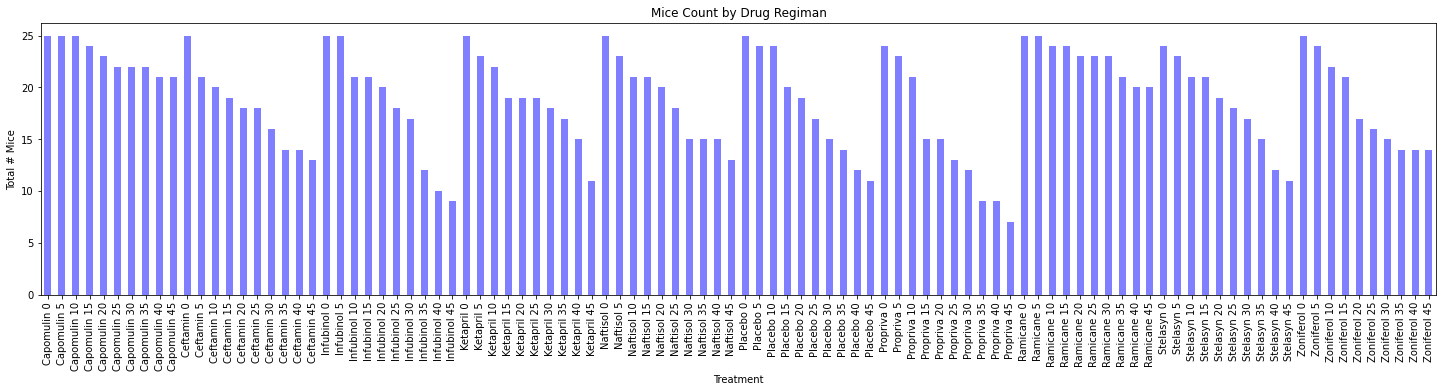

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Using Pandas to Chart a DataFrame

# Organize the data: Group the data by drug and timepoint to get count of mice at each timepoint
bar_data = clean_data.groupby(['Drug Regimen','Timepoint'])['Sex'].count()
bar_data_df = pd.DataFrame(bar_data)
bar_data_df = bar_data_df.reset_index('Timepoint')
bar_data_df = bar_data_df.reset_index('Drug Regimen')
bar_data_df = bar_data_df.rename(columns={'Sex': 'Total Number of Mice'})  
bar_data_df['x_axis'] = bar_data_df['Drug Regimen'] + ' ' + bar_data_df['Timepoint'].astype(str)
bar_data_df.set_index('x_axis')  # sets as x axis in pnadas bar plot

# Create bar chart using pandas
bar_pandas = bar_data_df[['x_axis', 'Total Number of Mice']]
bar_pandas = bar_pandas.set_index('x_axis')
bar_pandas.plot(kind="bar", figsize=(25,5), color = ['blue'], alpha=0.5, legend = False)
plt.xlabel("Treatment")
plt.ylabel('Total # Mice')
plt.title("Mice Count by Drug Regiman")

# bar_pandas.set_xticklabels(bar_data_df['x_axis'], rotation=45)
# A little confusing on what was being asked so this could be wrong. Other people in class I saw did this differently.
plt.show()

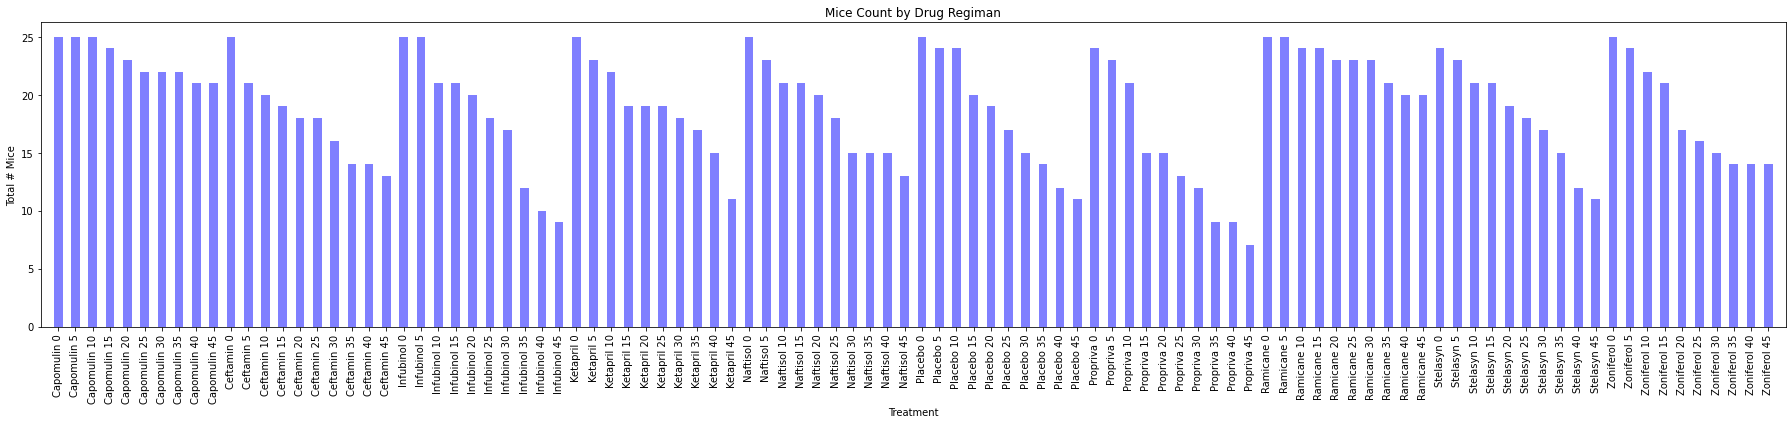

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# bar_data = clean_data.groupby(['Drug Regimen','Timepoint'])['Sex'].count()

x_axis = bar_data_df['x_axis']
y_axis = bar_data_df['Total Number of Mice']
plt.figure(figsize=(25,6))
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, width = 0.5,align="center")
plt.xlim(-1, len(x_axis))

tick_locations = [x for x in range(len(x_axis))]
plt.xticks(tick_locations,x_axis, rotation="vertical") 
plt.xlabel("Treatment")
plt.ylabel('Total # Mice')
plt.title("Mice Count by Drug Regiman")
plt.tight_layout()
plt.show()

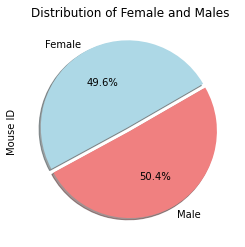

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_data.groupby(['Sex'])['Mouse ID'].nunique()
gender_df = pd.DataFrame(gender_df)
gender_df = gender_df.reset_index()
gender_df = gender_df.rename(columns={'Timepoint': 'Gender Count'})  
gender_count = gender_df["Mouse ID"]
gender_list = gender_df["Sex"]
colors =["lightblue","lightcoral"]
explode = (0.05,0)
gender_count.plot(kind="pie", y=gender_list, colors=colors,autopct="%1.1f%%", shadow=True,
                  startangle=30,explode = explode, labels = gender_list, title=("Distribution of Female and Males"))
gender_list
#gender_count.set_ylabel("Gender")
plt.show()

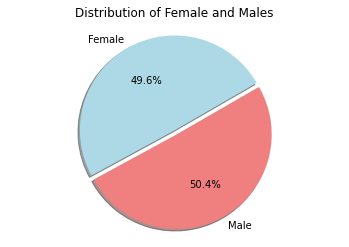

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors =["lightblue","lightcoral"]
explode = (0.05,0)
plt.pie(gender_count, labels=gender_list, colors=colors, 
        autopct="%1.1f%%", explode= explode, shadow=True, startangle=30)   #alpha =0.5
plt.title("Distribution of Female and Males")
plt.axis('equal')
plt.show()
#plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_data = clean_data.set_index('Drug Regimen')
tumor_data = tumor_data.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"] , ['Timepoint','Mouse ID',]]

# Start by getting the last (greatest) timepoint for each mouse using max. Groupby the Drug and Mouse ID
tumor_data_gp = tumor_data.groupby(['Drug Regimen','Mouse ID'])
tumor_data_max = tumor_data_gp.max()

# Merge max data df with the original dataframe to get the tumor volume at the greatest 'timepoint' for the mouse
tumor_data_max = tumor_data_max.reset_index()
tumor_data_max = pd.merge(tumor_data_max,clean_data,on=['Mouse ID','Timepoint','Drug Regimen'], how='left')   
tumor_data_max

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,Male,1,17
96,Ramicane,u196,45,40.667713,3,Male,18,25
97,Ramicane,w678,5,43.166373,0,Female,5,24
98,Ramicane,y449,15,44.183451,0,Male,19,24


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_vol = tumor_data_max[['Drug Regimen','Tumor Volume (mm3)']]
treatments = tumor_vol['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_stats = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    # add subset 
    tumors_treat = tumor_vol.loc[tumor_vol['Drug Regimen']== treatment, 'Tumor Volume (mm3)'] 
    
    # Calculate the quartiles for the drugs
    quartiles = tumors_treat.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.50]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds 
    dictary = {"Drug Regimen":treatment, "Lower Quartile":lowerq,"median":median}
    tumor_stats.append(dictary)
    outlier_treatment = [x for x in tumors_treat if (x < lowerq - (1.5*iqr)) | (x > upperq + (1.5*iqr))]
    print(f" Potential outliers for {treatment} are {outlier_treatment}")

 Potential outliers for Capomulin are []
 Potential outliers for Ceftamin are []
 Potential outliers for Infubinol are [36.321345799999996]
 Potential outliers for Ramicane are []


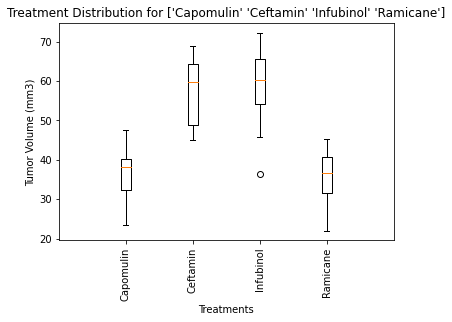

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
i = 0
for treatment in treatments:
    tumors_treat = tumor_vol.loc[tumor_vol['Drug Regimen']== treatment, 'Tumor Volume (mm3)']  #pandas.core.series.Series
    i = i + 1 
    plt.boxplot(tumors_treat, positions = [i])

# set labels of plot
tick_locations = np.arange(1,5)
plt.title(f"Treatment Distribution for {treatments}")
plt.xlabel('Treatments')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(tick_locations, treatments, rotation="vertical") 
plt.xlim(0,5)
plt.show()

## Line and Scatter Plots

Please enter a mouse number, we recommend x401:  x401


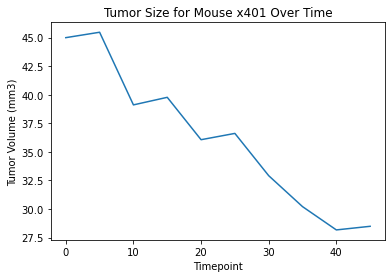

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse = input('Please enter a mouse number, we recommend x401:  ')
capomulin_timepoint_x = clean_data.loc[(clean_data['Mouse ID']==mouse),['Timepoint'] ]
capomulin_tumorvol_y = clean_data.loc[(clean_data['Mouse ID']==mouse),['Tumor Volume (mm3)'] ]

plt.plot(capomulin_timepoint_x,capomulin_tumorvol_y)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Tumor Size for Mouse {mouse} Over Time")
plt.show()

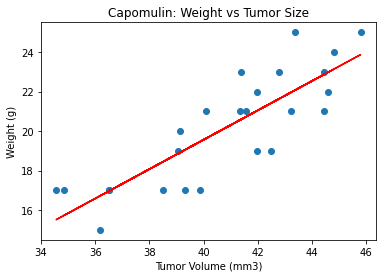

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Gather required data, groupby the Mouse ID, then calculate the average tumor size for each mouse over the the treatment.
capomulin = clean_data.loc[(clean_data['Drug Regimen']=='Capomulin'),['Mouse ID','Tumor Volume (mm3)','Weight (g)'] ]
capomulin = capomulin.groupby('Mouse ID')
capomulin_avg_Tumor_x = capomulin['Tumor Volume (mm3)'].mean()

# taking avg of wt which is itself, it works but probably a better way to do this
capomulin_wt_y= capomulin['Weight (g)'].mean()

# plot the data
plt.scatter(capomulin_avg_Tumor_x,capomulin_wt_y)
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.title("Capomulin: Weight vs Tumor Size")

#plotting the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_Tumor_x,capomulin_wt_y)
regress_values = capomulin_avg_Tumor_x * slope + intercept
plt.plot(capomulin_avg_Tumor_x,regress_values,"r-")

plt.show()


## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_Tumor_x,capomulin_wt_y)
print(f"The correleation coefficient is {round(rvalue,3)}.")
print(f"The linear regression line is y = {round(slope,2)}x {round(intercept,2)}")

The correleation coefficient is 0.842.
The linear regression line is y = 0.74x -10.15


In [46]:
# Summary
# As mouse weight increases so does average tumor volume and is hight correleted at ann r value of .82 

# Capomulin tumor size gets smaller over time for mouse X401.

# Both Capomulin and Ramicane had smaller tumor sizes at the end of the study than did Infubinol and Ceftamin.

# Looking at the bar graphs over time, the visual is obvious that Capomulin and Ramicane had more mice 
# alive by the end of the study than any other treatment.